In [1]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,8)

In [2]:
# Read data

df = pd.read_csv('movies.csv')
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [4]:
# Show data that's been released above 2000

df = df[(df.year >= 2000)]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3643,Almost Famous,R,Adventure,2000,"September 22, 2000 (United States)",7.9,260000.0,Cameron Crowe,Cameron Crowe,Billy Crudup,United States,60000000.0,47386287.0,Columbia Pictures,122.0
3644,American Psycho,R,Comedy,2000,"April 14, 2000 (United States)",7.6,514000.0,Mary Harron,Bret Easton Ellis,Christian Bale,United States,7000000.0,34266564.0,Am Psycho Productions,101.0
3645,Gladiator,R,Action,2000,"May 5, 2000 (United States)",8.5,1400000.0,Ridley Scott,David Franzoni,Russell Crowe,United States,103000000.0,465380802.0,Dreamworks Pictures,155.0
3646,Snatch,R,Comedy,2000,"January 19, 2001 (United States)",8.3,800000.0,Guy Ritchie,Guy Ritchie,Jason Statham,United Kingdom,NaN,83557872.0,Columbia Pictures,102.0
3647,Requiem for a Dream,Unrated,Drama,2000,"December 15, 2000 (United States)",8.3,786000.0,Darren Aronofsky,Hubert Selby Jr.,Ellen Burstyn,United States,4500000.0,7390108.0,Artisan Entertainment,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
# Resetting data index

df = df.reset_index()
df

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,3643,Almost Famous,R,Adventure,2000,"September 22, 2000 (United States)",7.9,260000.0,Cameron Crowe,Cameron Crowe,Billy Crudup,United States,60000000.0,47386287.0,Columbia Pictures,122.0
1,3644,American Psycho,R,Comedy,2000,"April 14, 2000 (United States)",7.6,514000.0,Mary Harron,Bret Easton Ellis,Christian Bale,United States,7000000.0,34266564.0,Am Psycho Productions,101.0
2,3645,Gladiator,R,Action,2000,"May 5, 2000 (United States)",8.5,1400000.0,Ridley Scott,David Franzoni,Russell Crowe,United States,103000000.0,465380802.0,Dreamworks Pictures,155.0
3,3646,Snatch,R,Comedy,2000,"January 19, 2001 (United States)",8.3,800000.0,Guy Ritchie,Guy Ritchie,Jason Statham,United Kingdom,NaN,83557872.0,Columbia Pictures,102.0
4,3647,Requiem for a Dream,Unrated,Drama,2000,"December 15, 2000 (United States)",8.3,786000.0,Darren Aronofsky,Hubert Selby Jr.,Ellen Burstyn,United States,4500000.0,7390108.0,Artisan Entertainment,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
4021,7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
4022,7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
4023,7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [6]:
# Removing Missing Values in Column Score, Votes, Budget, Gross 
df.dropna(subset=['score', 'votes', 'budget', 'gross'], axis=0, inplace=True)

# Resetting the index
df.reset_index(drop=True, inplace=True)
df

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,3643,Almost Famous,R,Adventure,2000,"September 22, 2000 (United States)",7.9,260000.0,Cameron Crowe,Cameron Crowe,Billy Crudup,United States,60000000.0,47386287.0,Columbia Pictures,122.0
1,3644,American Psycho,R,Comedy,2000,"April 14, 2000 (United States)",7.6,514000.0,Mary Harron,Bret Easton Ellis,Christian Bale,United States,7000000.0,34266564.0,Am Psycho Productions,101.0
2,3645,Gladiator,R,Action,2000,"May 5, 2000 (United States)",8.5,1400000.0,Ridley Scott,David Franzoni,Russell Crowe,United States,103000000.0,465380802.0,Dreamworks Pictures,155.0
3,3647,Requiem for a Dream,Unrated,Drama,2000,"December 15, 2000 (United States)",8.3,786000.0,Darren Aronofsky,Hubert Selby Jr.,Ellen Burstyn,United States,4500000.0,7390108.0,Artisan Entertainment,102.0
4,3648,Memento,R,Mystery,2000,"May 25, 2001 (United States)",8.4,1200000.0,Christopher Nolan,Christopher Nolan,Guy Pearce,United States,9000000.0,40047078.0,Newmarket Capital Group,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
3171,7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
3172,7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
3173,7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [7]:
# Checking if there any missing values
df.isnull().any()

index       False
name        False
rating       True
genre       False
year        False
released    False
score       False
votes       False
director    False
writer      False
star        False
country      True
budget      False
gross       False
company     False
runtime      True
dtype: bool

In [8]:
# Removing duplicates
df = df.drop_duplicates(subset='name', keep='first')

# Resetting index
df.reset_index(drop=True, inplace=True)

# Displaying the data
display(df)

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,3643,Almost Famous,R,Adventure,2000,"September 22, 2000 (United States)",7.9,260000.0,Cameron Crowe,Cameron Crowe,Billy Crudup,United States,60000000.0,47386287.0,Columbia Pictures,122.0
1,3644,American Psycho,R,Comedy,2000,"April 14, 2000 (United States)",7.6,514000.0,Mary Harron,Bret Easton Ellis,Christian Bale,United States,7000000.0,34266564.0,Am Psycho Productions,101.0
2,3645,Gladiator,R,Action,2000,"May 5, 2000 (United States)",8.5,1400000.0,Ridley Scott,David Franzoni,Russell Crowe,United States,103000000.0,465380802.0,Dreamworks Pictures,155.0
3,3647,Requiem for a Dream,Unrated,Drama,2000,"December 15, 2000 (United States)",8.3,786000.0,Darren Aronofsky,Hubert Selby Jr.,Ellen Burstyn,United States,4500000.0,7390108.0,Artisan Entertainment,102.0
4,3648,Memento,R,Mystery,2000,"May 25, 2001 (United States)",8.4,1200000.0,Christopher Nolan,Christopher Nolan,Guy Pearce,United States,9000000.0,40047078.0,Newmarket Capital Group,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
3157,7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
3158,7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
3159,7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


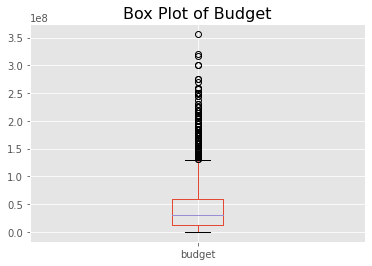

In [9]:
# Checking outliers for column Budget using Matplotlib

df['budget'].plot(kind = 'box')
plt.title('Box Plot of Budget', size = 16)
plt.show()

Text(0.5, 1.0, 'Box plot of Gross')

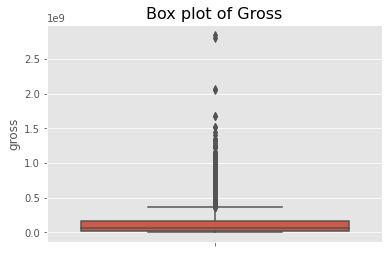

In [10]:
# Checking outliers for column Gross using Seaborn

sns.boxplot(y=df['gross']).set_title('Box plot of Gross', size=16)

In [11]:
#Order data by Gross

df.sort_values(by=['gross'], inplace=True, ascending=False)
df.reset_index(drop=True, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
1,7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
2,6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
3,7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
4,7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,6616,Barefoot,PG-13,Comedy,2014,"September 4, 2014 (Israel)",6.6,24000.0,Andrew Fleming,Stephen Zotnowski,Evan Rachel Wood,United States,6000000.0,1.507100e+04,WhiteFlame Productions,90.0
3157,3830,The Specials,R,Action,2000,"September 18, 2000 (United States)",5.8,2200.0,Craig Mazin,James Gunn,Rob Lowe,United States,1000000.0,1.327600e+04,Brillstein-Grey Entertainment,82.0
3158,6147,About Cherry,R,Drama,2012,"August 9, 2012 (United States)",4.8,10000.0,Stephen Elliott,Stephen Elliott,Ashley Hinshaw,United States,2500000.0,8.315000e+03,Enderby Entertainment,98.0
3159,5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0


In [26]:
# Grouping Company and sort by the largest gross earnings

company_grouped = df.groupby(['company'])[['score', 'votes','budget', 'gross']].sum()
company_grouped.sort_values(by=['gross'], inplace=True, ascending=False)
company_grouped

,score,votes,budget,gross
company,,,,
Warner Bros.,1190.0,49725800.0,1.528190e+10,4.444570e+10
Universal Pictures,1242.6,34344000.0,1.199150e+10,3.874467e+10
Columbia Pictures,1108.6,31011500.0,1.197380e+10,3.508981e+10
Walt Disney Pictures,486.6,15056900.0,9.111500e+09,3.018901e+10
Twentieth Century Fox,795.0,27121700.0,9.007100e+09,3.011697e+10
...,...,...,...,...
Fewlas Entertainment,5.7,25000.0,1.000000e+06,2.434300e+04
WhiteFlame Productions,6.6,24000.0,6.000000e+06,1.507100e+04
Enderby Entertainment,4.8,10000.0,2.500000e+06,8.315000e+03


In [31]:
# Grouping Company to see how company doing each year

df_grouped = df.groupby(['company', 'year'])[['score', 'votes','budget', 'gross']].agg(['sum', 'mean'])
df_grouped.sort_values(by=['year'], inplace=True, ascending=True)
df_grouped

score  ...         gross
                                           sum  ...          mean
company                             year        ...              
Castle Rock Entertainment           2000  25.9  ...  7.794131e+07
Broadway Pictures                   2000   5.2  ...  1.374321e+07
Altavista Films                     2000   8.1  ...  2.090847e+07
Touchstone Pictures                 2000  47.0  ...  1.326417e+08
Pathé Pictures International        2000   6.0  ...  2.997920e+05
...                                        ...  ...           ...
Universal Pictures                  2020  12.7  ...  1.943194e+08
20th Century Studios                2020   6.8  ...  1.111055e+08
Clubhouse Pictures (II)             2020   6.1  ...  2.018585e+08
Warner Bros.                        2020   7.4  ...  3.636566e+08
Beijing Diqi Yinxiang Entertainment 2020   6.8  ...  4.614216e+08

[1680 rows x 8 columns]

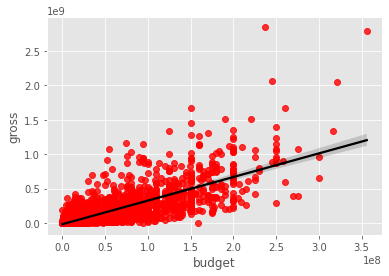

In [12]:
# Checking correlation between Gross and Budget with Scatterplot using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color' : 'red'}, line_kws={'color' : 'black'})

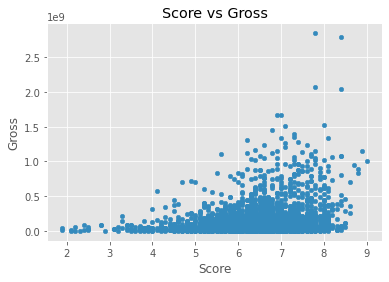

In [13]:
# Checking correlation between Gross and Score with Scatterplot using Matplotlib
df.plot(kind='scatter', x='score', y='gross')

plt.title('Score vs Gross')
plt.xlabel('Score')
plt.ylabel('Gross')
plt.show()

In [35]:
# Checking correlation

df.corr()

,index,year,score,votes,budget,gross,runtime
index,1.000000,0.998776,0.072693,0.023464,0.084608,0.150385,0.071034
year,0.998776,1.000000,0.090898,0.053524,0.104095,0.172315,0.087936
score,0.072693,0.090898,1.000000,0.498451,0.087932,0.227203,0.433764
votes,0.023464,0.053524,0.498451,1.000000,0.468132,0.628269,0.408110
budget,0.084608,0.104095,0.087932,0.468132,1.000000,0.755162,0.352049
gross,0.150385,0.172315,0.227203,0.628269,0.755162,1.000000,0.311246
runtime,0.071034,0.087936,0.433764,0.408110,0.352049,0.311246,1.000000


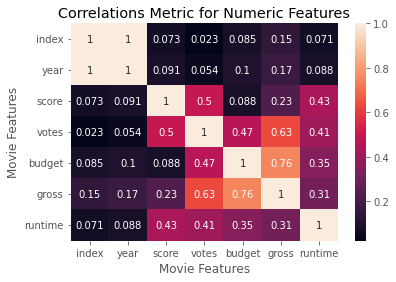

In [36]:
# Visualize correlation
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlations Metric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()            

Gross has higher correlation to Budget than to Score

In [37]:
# Encoding feature values that's in strings

df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype=='object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,5445,232,4,0,2009,290,7.8,1100000.0,538,787,966,42,237000000.0,2.847246e+09,815,162.0
1,7445,234,4,0,2019,78,8.4,903000.0,71,319,928,42,356000000.0,2.797501e+09,577,181.0
2,6663,2107,4,0,2015,292,7.8,876000.0,530,1132,235,42,245000000.0,2.069522e+09,553,138.0
3,7244,235,4,0,2018,83,8.4,897000.0,71,319,928,42,321000000.0,2.048360e+09,577,149.0
4,7480,2582,3,2,2019,643,6.9,222000.0,688,844,294,42,260000000.0,1.670728e+09,843,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,6616,263,4,4,2014,1436,6.6,24000.0,49,1762,354,42,6000000.0,1.507100e+04,853,90.0
3157,3830,2774,5,0,2000,1371,5.8,2200.0,245,793,925,42,1000000.0,1.327600e+04,187,82.0
3158,6147,103,5,6,2012,254,4.8,10000.0,1239,1752,90,42,2500000.0,8.315000e+03,345,98.0
3159,5640,2193,5,6,2009,502,5.8,3500.0,420,1805,939,42,3000000.0,5.073000e+03,818,96.0


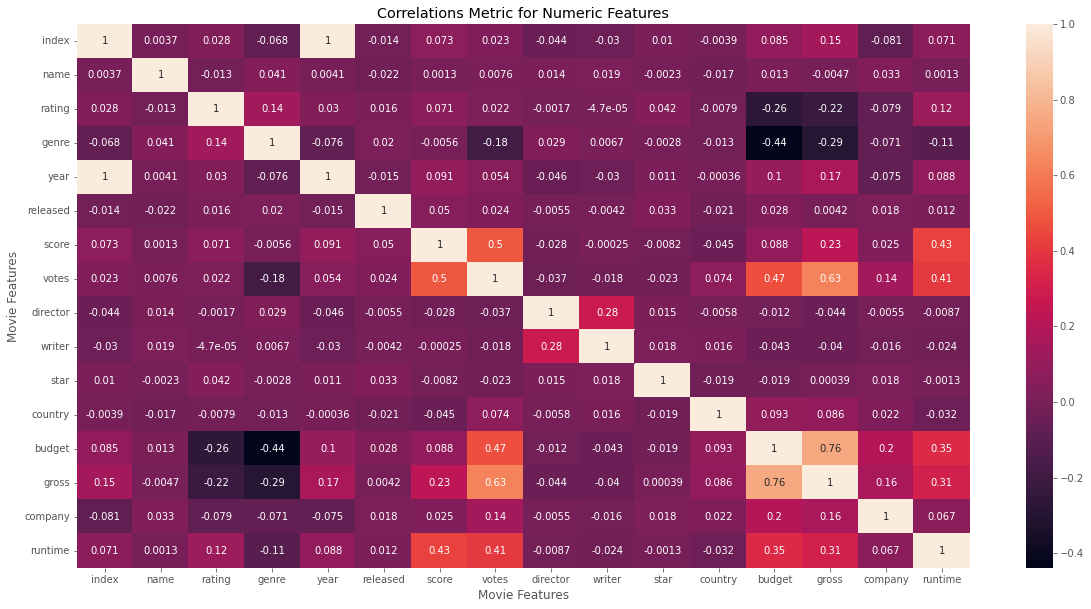

In [39]:
# Visualize correlation between all movies features
correlation_mat = df_numerized.corr(method='pearson')

sns.heatmap(correlation_mat, annot=True)
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,20

plt.title('Correlations Metric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()            

In [40]:
# Unstacking correlation matrix

corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.438780
genre    budget    -0.438780
         gross     -0.289634
gross    genre     -0.289634
budget   rating    -0.260234
                      ...   
genre    genre      1.000000
rating   rating     1.000000
name     name       1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 256, dtype: float64

In [41]:
# Shows features that have correlation higher than 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.628269
votes     gross       0.628269
budget    gross       0.755162
gross     budget      0.755162
year      index       0.998776
index     year        0.998776
          index       1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
name      name        1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Data Source : https://www.kaggle.com/danielgrijalvas/movies/version/2